# Pymaceuticals Analysis

- Pymaceuticals is a company that specializes in anti-cancer medications.
- There was a **mice study**. 249 mice who had squamous cell carcinoma (SCC) tumors received drug treatment
- Tumor development was tracked & measured over 45 days.
- **Study compared performance of Capomulin to other treatment regimens**

- Our task is to generate all the tables and figures needed for the technical report of the clinical study. We also should generate a top-level summary of the study results. 

In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

# Preparing the Data

In [2]:
# reading in data
mouse_metadata = pd.read_csv('data/Mouse_metadata.csv')
study_results = pd.read_csv('data/Study_results.csv')

In [3]:
mouse_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [4]:
study_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [5]:
# merging the data based on 'Mouse ID'
study_data = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')
study_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [6]:
study_data.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [7]:
# check number of mice
number_mice_in_study = len(study_data['Mouse ID'].unique())
number_mice_in_study

249

In [8]:
# checking for any Mouse ID with duplicate time points
duplicated_ID_timepoint_data = study_data[study_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicated_ID_timepoint_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# showing all the data for the duplicated Mouse IDs 
dup_mouse_data = study_data.loc[study_data['Mouse ID']=='g989']
dup_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# dropping duplicated mouse's observations from dataframe
clean_study_data = study_data.loc[study_data['Mouse ID']!='g989']
print(len(clean_study_data['Mouse ID'].unique()))

248


# Summary Statistics

In [11]:
clean_study_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# generating mean of tumor volume for each drug regimen
mean_tumor_vol = clean_study_data.groupby(['Drug Regimen']).mean(numeric_only=True)['Tumor Volume (mm3)']

# generating median of tumor volume for each drug regimen
med_tumor_vol = clean_study_data.groupby(['Drug Regimen']).median(numeric_only=True)['Tumor Volume (mm3)']

# generating variance of tumor volume for each drug regimen
#drug_groupby = clean_study_data.groupby(['Drug Regimen'])
var_tumor_vol = clean_study_data.groupby(['Drug Regimen']).agg(np.var)['Tumor Volume (mm3)']

#s2_tumor_volume = np.std(drug_groupby)
std_tumor_vol = clean_study_data.groupby(['Drug Regimen']).agg(np.std)['Tumor Volume (mm3)']

# SEM of tumor volume
sem_tumor_vol = clean_study_data.groupby(['Drug Regimen']).agg(st.sem)['Tumor Volume (mm3)']

# assemble series into dataframe
summary_stats_tumor_vol = pd.DataFrame({"Mean Tumor Volume": mean_tumor_vol,
                                        "Median Tumor Volume": med_tumor_vol,
                                        "Tumor Volume Variance": var_tumor_vol,
                                        "Tumor Volume Std. Dev.": std_tumor_vol,
                                        "Tumor Volume Std. Err.": sem_tumor_vol})

summary_stats_tumor_vol

C:\Users\speer\AppData\Local\Temp\ipykernel_26044\4053990284.py:15: FutureWarning: The operation <function var at 0x000001F3C59D4430> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  var_tumor_vol = clean_study_data.groupby(['Drug Regimen']).agg(np.var)['Tumor Volume (mm3)']
C:\Users\speer\AppData\Local\Temp\ipykernel_26044\4053990284.py:18: FutureWarning: The operation <function std at 0x000001F3C59D4280> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  std_tumor_vol = clean_study_data.groupby(['Drug Regimen']).agg(np.std)['Tumor Volume (mm3)']
C:\Users\speer\AppData\Local\Temp\ipykernel_26044\4053990284.py:21: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.


summary_stats_tumor_vol = clean_study_data.groupby(['Drug Regimen']).agg(['mean', 'median', np.var, np.std, st.sem])['Tumor Volume (mm3)']
summary_stats_tumor_vol.rename(columns={"mean": 'Mean Tumor Volume',
                                        "median": 'Median Tumor Volume',
                                        'var': 'Tumor Volume Variance',
                                        'std': 'Tumor Volume Std. Dev.',
                                        'sem': 'Tumor Volume Std. Err.'})

C:\Users\speer\AppData\Local\Temp\ipykernel_26044\1487721928.py:7: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summary_stats_tumor_vol = clean_study_data.groupby(['Drug Regimen']).agg(['mean', 'median', np.var, np.std, st.sem])['Tumor Volume (mm3)']


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar Charts and Pie Charts

## Bar Charts

In [14]:
clean_study_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


<Axes: title={'center': 'Number of Timepoints for Each Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Timepoints'>

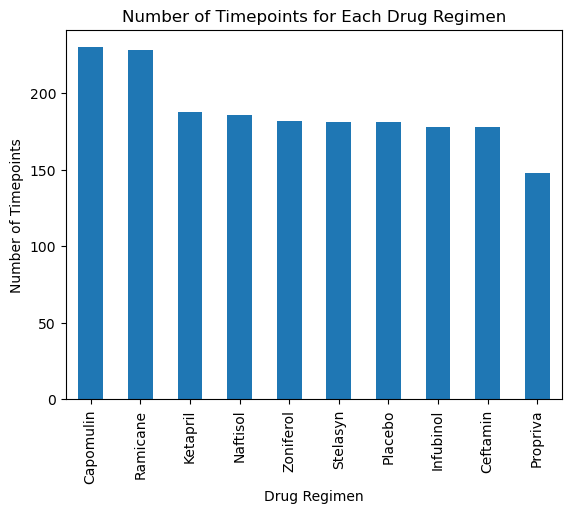

In [43]:
drug_regimen_timepoint_count = clean_study_data['Drug Regimen'].value_counts()
# create bar graph
drug_regimen_timepoint_count.plot(kind='bar', xlabel='Drug Regimen', ylabel='Number of Timepoints',
                                  title='Number of Timepoints for Each Drug Regimen')

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Timepoint, dtype: int64


<Axes: title={'center': 'Number of Timepoints for Each Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Timepoints'>

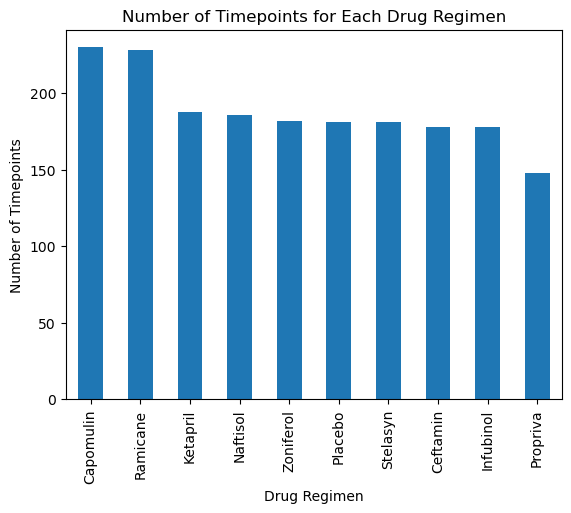

In [21]:
# # Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# group counts of timepoints for each drug regimen
drug_regimen_timepoint_count = clean_study_data.groupby(['Drug Regimen']).count()['Timepoint'].sort_values(ascending=False)
print(drug_regimen_timepoint_count)


# create bar graph
drug_regimen_timepoint_count.plot(kind='bar', xlabel='Drug Regimen', ylabel='Number of Timepoints',
                                  title='Number of Timepoints for Each Drug Regimen')

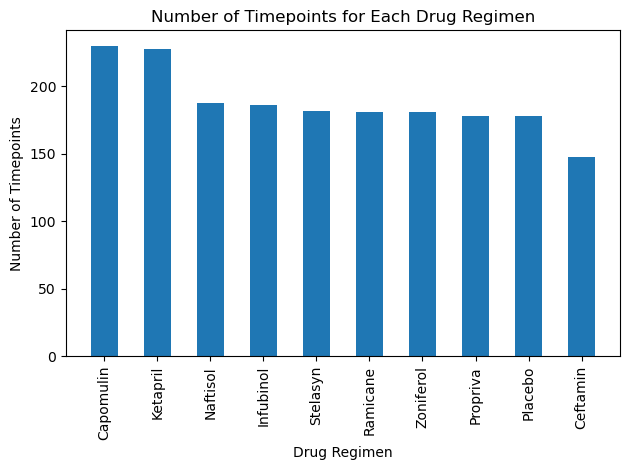

In [33]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(clean_study_data['Drug Regimen'].unique(), drug_regimen_timepoint_count, width=.5)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.xticks(clean_study_data['Drug Regimen'].unique(), rotation=90) #
plt.title('Number of Timepoints for Each Drug Regimen')
plt.tight_layout()

## Pie Charts

In [34]:
clean_study_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


In [82]:
clean_study_data.groupby(['Sex']).count()['Mouse ID']

AttributeError: 'DataFrameGroupBy' object has no attribute 'unique'

<Axes: ylabel='Sex'>

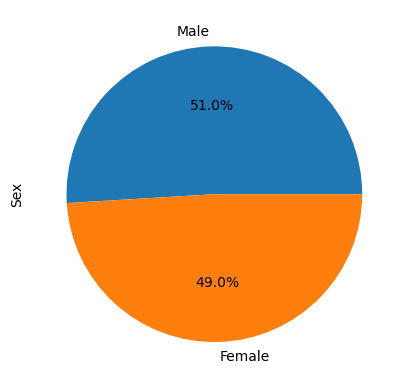

In [73]:
gender_mouse_count = clean_study_data['Sex'].value_counts()
gender_mouse_count.plot(kind='pie', autopct="%1.1f%%", ylabel='Sex')

Sex
Male      958
Female    922
Name: Mouse ID, dtype: int64


<Axes: ylabel='Sex'>

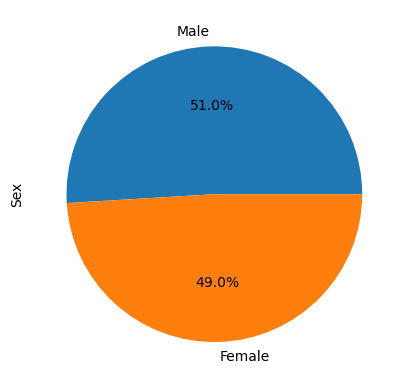

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# generating series of male vs female
gender_mouse_count = clean_study_data.groupby(['Sex']).count()['Mouse ID'].sort_values(ascending=False)
print(gender_mouse_count)

# generating plot
gender_mouse_count.plot(kind='pie',autopct="%1.1f%%", ylabel='Sex')

In [71]:
gender_mouse_count

array([922, 958], dtype=int64)

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie()